In [1]:
import pandas as pd
from dsc2024 import datasets

In [2]:
%%time
df = datasets.get_train_dataset(raw_data=True)

CPU times: user 1.03 s, sys: 78.5 ms, total: 1.1 s
Wall time: 1.68 s


In [3]:
len(df)

211679

In [4]:
import networkx as nx

In [5]:
set(df['origem'])

{'SBBR',
 'SBCF',
 'SBCT',
 'SBFL',
 'SBGL',
 'SBGR',
 'SBKP',
 'SBPA',
 'SBRF',
 'SBRJ',
 'SBSP',
 'SBSV'}

In [6]:
set(df['destino'])

{'SBBR',
 'SBCF',
 'SBCT',
 'SBFL',
 'SBGL',
 'SBGR',
 'SBKP',
 'SBPA',
 'SBRF',
 'SBRJ',
 'SBSP',
 'SBSV'}

In [7]:
set(df['destino']) == set(df['origem'])

True

In [8]:
nodes = set(df['destino'])

In [9]:
number_of_nodes= len(nodes)

In [10]:
arcs = list(zip(df.origem,df.destino))

In [11]:
arcs

[('SBCF', 'SBFL'),
 ('SBPA', 'SBFL'),
 ('SBSP', 'SBCF'),
 ('SBGR', 'SBCT'),
 ('SBSP', 'SBSV'),
 ('SBGR', 'SBPA'),
 ('SBKP', 'SBBR'),
 ('SBRF', 'SBGR'),
 ('SBGR', 'SBPA'),
 ('SBPA', 'SBGR'),
 ('SBSP', 'SBCT'),
 ('SBGR', 'SBGL'),
 ('SBGR', 'SBBR'),
 ('SBKP', 'SBPA'),
 ('SBRJ', 'SBSV'),
 ('SBSP', 'SBRF'),
 ('SBRJ', 'SBBR'),
 ('SBGR', 'SBRF'),
 ('SBBR', 'SBSV'),
 ('SBPA', 'SBKP'),
 ('SBCF', 'SBBR'),
 ('SBGR', 'SBCT'),
 ('SBGR', 'SBSV'),
 ('SBGR', 'SBRF'),
 ('SBRJ', 'SBRF'),
 ('SBGR', 'SBFL'),
 ('SBKP', 'SBCT'),
 ('SBRF', 'SBSV'),
 ('SBCF', 'SBGR'),
 ('SBGR', 'SBSV'),
 ('SBKP', 'SBRF'),
 ('SBCT', 'SBGR'),
 ('SBKP', 'SBCF'),
 ('SBGR', 'SBGL'),
 ('SBCF', 'SBRF'),
 ('SBPA', 'SBGR'),
 ('SBKP', 'SBGL'),
 ('SBRF', 'SBGR'),
 ('SBGR', 'SBRF'),
 ('SBBR', 'SBGR'),
 ('SBKP', 'SBFL'),
 ('SBCT', 'SBFL'),
 ('SBRF', 'SBCF'),
 ('SBRF', 'SBSP'),
 ('SBRF', 'SBGR'),
 ('SBRF', 'SBGL'),
 ('SBSV', 'SBCF'),
 ('SBRF', 'SBBR'),
 ('SBRF', 'SBRJ'),
 ('SBRF', 'SBKP'),
 ('SBSV', 'SBSP'),
 ('SBSV', 'SBGR'),
 ('SBSV', 'S

In [12]:
arcs_freq= {x : arcs.count(x) for x in set(arcs)}

In [13]:
number_of_edges= len(arcs_freq)

In [14]:
number_of_nodes*(number_of_nodes-1) 

132

In [15]:
number_of_edges

129

In [16]:
edges= [tuple(list(tup)+[val] )     for tup,val in zip(arcs_freq.keys(),arcs_freq.values())]

In [17]:
edges

[('SBFL', 'SBCT', 76),
 ('SBBR', 'SBRF', 1145),
 ('SBFL', 'SBSV', 17),
 ('SBCF', 'SBRJ', 2837),
 ('SBPA', 'SBGR', 3628),
 ('SBKP', 'SBCT', 1792),
 ('SBSV', 'SBGR', 1798),
 ('SBGR', 'SBPA', 4021),
 ('SBSV', 'SBFL', 17),
 ('SBSP', 'SBGR', 15),
 ('SBRF', 'SBGL', 515),
 ('SBRJ', 'SBCT', 1673),
 ('SBGL', 'SBPA', 24),
 ('SBCF', 'SBPA', 499),
 ('SBRJ', 'SBSV', 1691),
 ('SBPA', 'SBBR', 1063),
 ('SBCF', 'SBRF', 842),
 ('SBCT', 'SBGR', 3065),
 ('SBBR', 'SBGR', 2626),
 ('SBFL', 'SBPA', 454),
 ('SBPA', 'SBGL', 26),
 ('SBSV', 'SBBR', 1125),
 ('SBSP', 'SBBR', 4408),
 ('SBSV', 'SBSP', 2883),
 ('SBGR', 'SBKP', 36),
 ('SBGL', 'SBKP', 965),
 ('SBKP', 'SBPA', 2093),
 ('SBCT', 'SBBR', 926),
 ('SBCF', 'SBKP', 2264),
 ('SBBR', 'SBSP', 4370),
 ('SBGL', 'SBFL', 28),
 ('SBCF', 'SBFL', 261),
 ('SBFL', 'SBKP', 1128),
 ('SBPA', 'SBCT', 1308),
 ('SBRF', 'SBRJ', 914),
 ('SBPA', 'SBSV', 82),
 ('SBGR', 'SBRJ', 3023),
 ('SBGL', 'SBRJ', 94),
 ('SBSP', 'SBCT', 3537),
 ('SBGL', 'SBCF', 83),
 ('SBSP', 'SBSV', 2860),
 ('SB

In [18]:
G= nx.DiGraph()

In [19]:
G_topo = nx.Graph()

In [20]:
G_topo.add_weighted_edges_from(edges)

In [21]:
G.add_weighted_edges_from(edges)

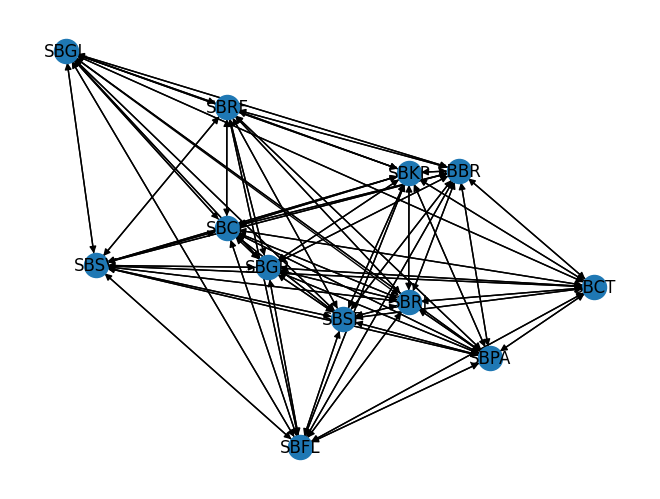

In [22]:
nx.draw(G,with_labels=True)

{('SBFL', 'SBCT'): Text(-0.23074428252574386, 0.23090237158690163, '76'),
 ('SBFL', 'SBSV'): Text(-0.21092844872478078, 0.4664480324346343, '17'),
 ('SBFL', 'SBPA'): Text(-0.06241198838186257, 0.675046532618802, '454'),
 ('SBFL', 'SBKP'): Text(0.20869874836865931, 0.5188302523372159, '1128'),
 ('SBFL', 'SBRJ'): Text(-0.07735746337531801, 0.37046534167367207, '1066'),
 ('SBFL', 'SBRF'): Text(0.30879386950200804, 0.31354179221034073, '18'),
 ('SBFL', 'SBCF'): Text(0.1439664686205402, 0.20932873364780913, '262'),
 ('SBFL', 'SBSP'): Text(-0.00025217499885576977, 0.41151962477198145, '2795'),
 ('SBFL', 'SBGR'): Text(0.17316589536271532, 0.4139456564535984, '1922'),
 ('SBFL', 'SBBR'): Text(0.03846144924946726, 0.15113894979189135, '532'),
 ('SBFL', 'SBGL'): Text(0.5879290844606386, 0.15992670664727493, '18'),
 ('SBCT', 'SBGR'): Text(-0.2334438710566491, -0.1393702033152382, '3065'),
 ('SBCT', 'SBBR'): Text(-0.3681324536537892, -0.40218049655297605, '926'),
 ('SBCT', 'SBSV'): Text(-0.61753525

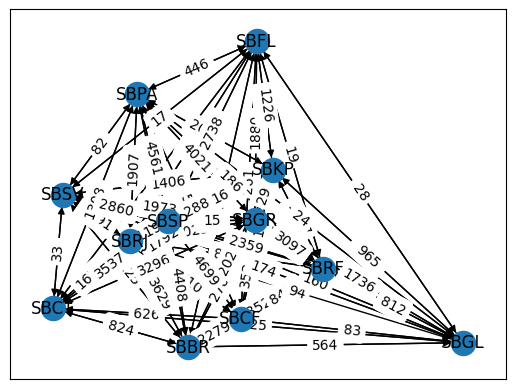

In [23]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [24]:
nx.edge_betweenness_centrality(G)

{('SBFL', 'SBCT'): 0.008333333333333335,
 ('SBFL', 'SBSV'): 0.007575757575757576,
 ('SBFL', 'SBPA'): 0.007575757575757576,
 ('SBFL', 'SBKP'): 0.007575757575757576,
 ('SBFL', 'SBRJ'): 0.007575757575757576,
 ('SBFL', 'SBRF'): 0.008333333333333335,
 ('SBFL', 'SBCF'): 0.007575757575757576,
 ('SBFL', 'SBSP'): 0.007575757575757576,
 ('SBFL', 'SBGR'): 0.007575757575757576,
 ('SBFL', 'SBBR'): 0.007575757575757576,
 ('SBFL', 'SBGL'): 0.008333333333333335,
 ('SBCT', 'SBGR'): 0.008333333333333335,
 ('SBCT', 'SBBR'): 0.008333333333333335,
 ('SBCT', 'SBSV'): 0.008333333333333335,
 ('SBCT', 'SBGL'): 0.009090909090909092,
 ('SBCT', 'SBRJ'): 0.008333333333333335,
 ('SBCT', 'SBPA'): 0.008333333333333335,
 ('SBCT', 'SBKP'): 0.008333333333333335,
 ('SBCT', 'SBFL'): 0.008333333333333335,
 ('SBCT', 'SBCF'): 0.008333333333333335,
 ('SBCT', 'SBSP'): 0.008333333333333335,
 ('SBBR', 'SBRF'): 0.008333333333333335,
 ('SBBR', 'SBGR'): 0.007575757575757576,
 ('SBBR', 'SBSP'): 0.007575757575757576,
 ('SBBR', 'SBSV'

In [25]:
nx.edge_load_centrality(G)

{('SBFL', 'SBCT'): 13.0,
 ('SBCT', 'SBFL'): 13.0,
 ('SBFL', 'SBSV'): 12.0,
 ('SBSV', 'SBFL'): 12.0,
 ('SBFL', 'SBPA'): 12.0,
 ('SBPA', 'SBFL'): 12.0,
 ('SBFL', 'SBKP'): 12.0,
 ('SBKP', 'SBFL'): 12.0,
 ('SBFL', 'SBRJ'): 13.0,
 ('SBRJ', 'SBFL'): 13.0,
 ('SBFL', 'SBRF'): 13.0,
 ('SBRF', 'SBFL'): 13.0,
 ('SBFL', 'SBCF'): 12.0,
 ('SBCF', 'SBFL'): 12.0,
 ('SBFL', 'SBSP'): 12.0,
 ('SBSP', 'SBFL'): 12.0,
 ('SBFL', 'SBGR'): 12.0,
 ('SBGR', 'SBFL'): 12.0,
 ('SBFL', 'SBBR'): 12.0,
 ('SBBR', 'SBFL'): 12.0,
 ('SBFL', 'SBGL'): 12.0,
 ('SBGL', 'SBFL'): 12.0,
 ('SBCT', 'SBGR'): 13.0,
 ('SBGR', 'SBCT'): 13.0,
 ('SBCT', 'SBBR'): 13.0,
 ('SBBR', 'SBCT'): 13.0,
 ('SBCT', 'SBSV'): 13.0,
 ('SBSV', 'SBCT'): 13.0,
 ('SBCT', 'SBGL'): 13.0,
 ('SBGL', 'SBCT'): 13.0,
 ('SBCT', 'SBRJ'): 14.0,
 ('SBRJ', 'SBCT'): 14.0,
 ('SBCT', 'SBPA'): 13.0,
 ('SBPA', 'SBCT'): 13.0,
 ('SBCT', 'SBKP'): 13.0,
 ('SBKP', 'SBCT'): 13.0,
 ('SBCT', 'SBCF'): 13.0,
 ('SBCF', 'SBCT'): 13.0,
 ('SBCT', 'SBSP'): 13.0,
 ('SBSP', 'SBCT'): 13.0,


In [26]:
nx.edge_betweenness_centrality(G, weight='weight')

{('SBFL', 'SBCT'): 0.0,
 ('SBFL', 'SBSV'): 0.07575757575757576,
 ('SBFL', 'SBPA'): 0.0,
 ('SBFL', 'SBKP'): 0.0,
 ('SBFL', 'SBRJ'): 0.0,
 ('SBFL', 'SBRF'): 0.07575757575757576,
 ('SBFL', 'SBCF'): 0.0,
 ('SBFL', 'SBSP'): 0.0,
 ('SBFL', 'SBGR'): 0.0,
 ('SBFL', 'SBBR'): 0.08333333333333334,
 ('SBFL', 'SBGL'): 0.2878787878787879,
 ('SBCT', 'SBGR'): 0.0,
 ('SBCT', 'SBBR'): 0.0,
 ('SBCT', 'SBSV'): 0.007575757575757576,
 ('SBCT', 'SBGL'): 0.07575757575757576,
 ('SBCT', 'SBRJ'): 0.0,
 ('SBCT', 'SBPA'): 0.0,
 ('SBCT', 'SBKP'): 0.0,
 ('SBCT', 'SBFL'): 0.0,
 ('SBCT', 'SBCF'): 0.0,
 ('SBCT', 'SBSP'): 0.0,
 ('SBBR', 'SBRF'): 0.0,
 ('SBBR', 'SBGR'): 0.0,
 ('SBBR', 'SBSP'): 0.0,
 ('SBBR', 'SBSV'): 0.0,
 ('SBBR', 'SBGL'): 0.0,
 ('SBBR', 'SBCT'): 0.0,
 ('SBBR', 'SBPA'): 0.0,
 ('SBBR', 'SBKP'): 0.0,
 ('SBBR', 'SBFL'): 0.08333333333333334,
 ('SBBR', 'SBRJ'): 0.0,
 ('SBBR', 'SBCF'): 0.0,
 ('SBRF', 'SBGL'): 0.0,
 ('SBRF', 'SBRJ'): 0.0,
 ('SBRF', 'SBPA'): 0.0,
 ('SBRF', 'SBKP'): 0.0,
 ('SBRF', 'SBFL'): 0.159

In [27]:
nx.google_matrix(G)[0,1]

0.020294401544401545

In [28]:
nx.is_directed(G)

True

In [29]:
arr= nx.adjacency_matrix(G)

In [30]:
type(nx.edge_betweenness_centrality(G))

dict

In [31]:
from typing import Dict


In [32]:
def insert_graph_measure(df: pd.DataFrame, measure_dict: Dict, name_measure: str, directed:bool= True):

    df[name_measure] = pd.Series(dtype=float)

    for edge,measure_value in measure_dict.items():
        if directed:
            origem, destino = edge
            df.loc[(df.origem == origem) & (df.destino == destino), name_measure] = measure_value
        else:
            origem, destino = edge
            df.loc[(df.origem == origem) & (df.destino == destino) | (df.origem == destino) & (df.destino == origem), name_measure] = measure_value



In [33]:
G.nodes()

NodeView(('SBFL', 'SBCT', 'SBBR', 'SBRF', 'SBSV', 'SBCF', 'SBRJ', 'SBPA', 'SBGR', 'SBKP', 'SBSP', 'SBGL'))

In [34]:
import numpy as np
import networkx as nx
import pandas as pd


def insert_graph_measure(df: pd.DataFrame, measure_dict: Dict, name_measure: str, directed:bool= True):

    df[name_measure] = pd.Series(dtype=float)

    for edge,measure_value in measure_dict.items():
        if directed:
            origem, destino = edge
            df.loc[(df.origem == origem) & (df.destino == destino), name_measure] = measure_value
        else:
            origem, destino = edge
            df.loc[(df.origem == origem) & (df.destino == destino) | (df.origem == destino) & (df.destino == origem), name_measure] = measure_value



def generate_graph_features(df: pd.DataFrame):

    arcs = list(zip(df.origem,df.destino))

    arcs_freq= {x : arcs.count(x) for x in set(arcs)}


    G= nx.DiGraph()

    G_topo = nx.Graph()

    edges= [tuple(list(tup)+[val] )  for tup,val in zip(arcs_freq.keys(),arcs_freq.values())]

    G.add_weighted_edges_from(edges)

    G_topo.add_weighted_edges_from(edges)

    insert_graph_measure(df,nx.edge_betweenness_centrality(G), 'betwenness')    

    insert_graph_measure(df,nx.edge_current_flow_betweenness_centrality(G_topo),'flow_betweenness_topo',directed=False)

    df['edge_connectivity'] = pd.Series(dtype=float)

    df['deg_diff'] = pd.Series(dtype=float)

    for origem, destino, weight in edges:
        
        connec = nx.algorithms.connectivity.local_edge_connectivity(G, destino, origem)
        degdiff = G.degree(destino) - G.degree(origem)
        df.loc[(df.origem == origem) & (df.destino == destino), 'edge_connectivity'] = connec
        df.loc[(df.origem == origem) & (df.destino == destino), 'deg_diff'] = degdiff


    gmatrix= nx.google_matrix(G)

    df['gmatrix']= pd.Series(dtype=float)

    nodes= list(G.nodes())

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            origem = nodes[i]
            destino = nodes[j]
            df.loc[(df.origem == origem) & (df.destino == destino), 'gmatrix'] = gmatrix[i][j]

#def graph_features_testdata(df: pd.DataFrame):

    


In [35]:
generate_graph_features(df)

In [36]:
df.head()

,flightid,hora_ref,origem,destino,url_img_satelite,metaf,metar,prev_troca_cabeceira,troca_cabeceira_hora_anterior,espera,betwenness,flow_betweenness_topo,edge_connectivity,deg_diff,gmatrix
0,504a62621cd231d6ab67e674ce538cd3,2022-06-01T01:00:00Z,SBCF,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.023878
1,b0fd0f83644625ecc21f5261e8e5e347,2022-06-01T01:00:00Z,SBPA,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.036542
2,1210f0ca07ddca00d09a3e02d3b100d8,2022-06-01T01:00:00Z,SBSP,SBCF,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCF 010000Z 12006KT CAVOK 21/14 Q1018=,0,0,0.0,0.007576,0.016667,11.0,0.0,0.122193
3,b25032f34507cce285ee779446496568,2022-06-01T01:00:00Z,SBGR,SBCT,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCT 010000Z 10006KT 7000 -RA BKN004 OVC...,0,0,0.0,0.008333,0.018182,10.0,-2.0,0.122057
4,00762a9892ecba7c66d1d87800d38cac,2022-06-01T01:00:00Z,SBSP,SBSV,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBSV 010000Z 11008KT 9999 FEW023 27/21 Q...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.079264


In [37]:
insert_graph_measure(df,nx.edge_betweenness_centrality(G), 'betwenness')

In [38]:
insert_graph_measure(df,nx.edge_current_flow_betweenness_centrality(G_topo),'flow_betweenness_topo',directed=False)

In [39]:
insert_graph_measure(df,nx.edge_load_centrality(G),'load_topo', directed=False)

In [40]:
list(nx.resource_allocation_index(G_topo))

[('SBCT', 'SBRF', 0.9090909090909093)]

In [41]:
df['betwenness']

0         0.007576
1         0.007576
2         0.007576
3         0.008333
4         0.007576
            ...   
211674    0.008333
211675    0.008333
211676    0.007576
211677    0.008333
211678    0.007576
Name: betwenness, Length: 211679, dtype: float64

In [42]:
df['flow_betweenness_topo']

0         0.016667
1         0.016667
2         0.016667
3         0.018182
4         0.016667
            ...   
211674    0.018182
211675    0.018182
211676    0.016667
211677    0.016667
211678    0.016667
Name: flow_betweenness_topo, Length: 211679, dtype: float64

In [43]:
import numpy as np

In [44]:
list(G.nodes())

['SBFL',
 'SBCT',
 'SBBR',
 'SBRF',
 'SBSV',
 'SBCF',
 'SBRJ',
 'SBPA',
 'SBGR',
 'SBKP',
 'SBSP',
 'SBGL']

In [45]:
np.argwhere(nx.to_numpy_array(G) == 0)

array([[ 0,  0],
       [ 1,  1],
       [ 1,  3],
       [ 2,  2],
       [ 3,  1],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 6, 11],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9],
       [10, 10],
       [11, 11]])

In [46]:
node_list = list(G.nodes())

In [47]:
for i in range(len(node_list)):
    print(node_list[i],i)

SBFL 0
SBCT 1
SBBR 2
SBRF 3
SBSV 4
SBCF 5
SBRJ 6
SBPA 7
SBGR 8
SBKP 9
SBSP 10
SBGL 11


In [48]:
df.head()

,flightid,hora_ref,origem,destino,url_img_satelite,metaf,metar,prev_troca_cabeceira,troca_cabeceira_hora_anterior,espera,betwenness,flow_betweenness_topo,edge_connectivity,deg_diff,gmatrix,load_topo
0,504a62621cd231d6ab67e674ce538cd3,2022-06-01T01:00:00Z,SBCF,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.023878,12.0
1,b0fd0f83644625ecc21f5261e8e5e347,2022-06-01T01:00:00Z,SBPA,SBFL,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBFL 010000Z 17009KT 140V200 9999 BKN030...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.036542,12.0
2,1210f0ca07ddca00d09a3e02d3b100d8,2022-06-01T01:00:00Z,SBSP,SBCF,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCF 010000Z 12006KT CAVOK 21/14 Q1018=,0,0,0.0,0.007576,0.016667,11.0,0.0,0.122193,12.0
3,b25032f34507cce285ee779446496568,2022-06-01T01:00:00Z,SBGR,SBCT,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBCT 010000Z 10006KT 7000 -RA BKN004 OVC...,0,0,0.0,0.008333,0.018182,10.0,-2.0,0.122057,13.0
4,00762a9892ecba7c66d1d87800d38cac,2022-06-01T01:00:00Z,SBSP,SBSV,http://satelite.cptec.inpe.br/repositoriogoes/...,NaN,METAR SBSV 010000Z 11008KT 9999 FEW023 27/21 Q...,0,1,0.0,0.007576,0.016667,11.0,0.0,0.079264,12.0


In [52]:
df.to_csv('flight_data.csv')